In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [91]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [92]:
print('Now there are', data.shape[0], 'rows and',data.shape[1],'columns in this dataset')

Now there are 1470 rows and 35 columns in this dataset


In [93]:
#Counting each value of each feature
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

From above it is seen that the column EmployeeNumber has unique values and it will be of unused so we will drop that column as it will not affect our results.

Now we will check the missing values in our data.

In [94]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

It is observed that our data does not have any null or missing values.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

From above it is seen that our data contains numerical and non-numerical data so we will seperate it.

In [96]:
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

Now we will check the statistical data of the numerical features.

In [97]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Observing the above data it is seen that some columns like EmployeeCount StandardHours and Over18 have one single value in all the rows.So we will drop the columns as it will not affect any of our results.

In [98]:
data = data.drop(columns = ["EmployeeNumber","EmployeeCount","StandardHours","Over18"])
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


Now we will check the distribution for target variable.

<AxesSubplot:xlabel='Attrition', ylabel='count'>

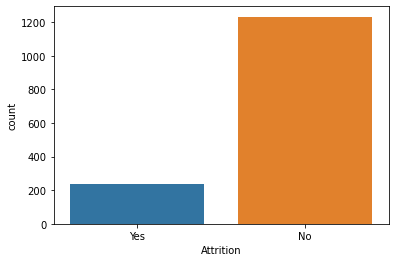

In [99]:
sns.countplot("Attrition" ,data = data)

From the graph it is seen that the target variable is imbalance.

Now we will visualize the numerical features.

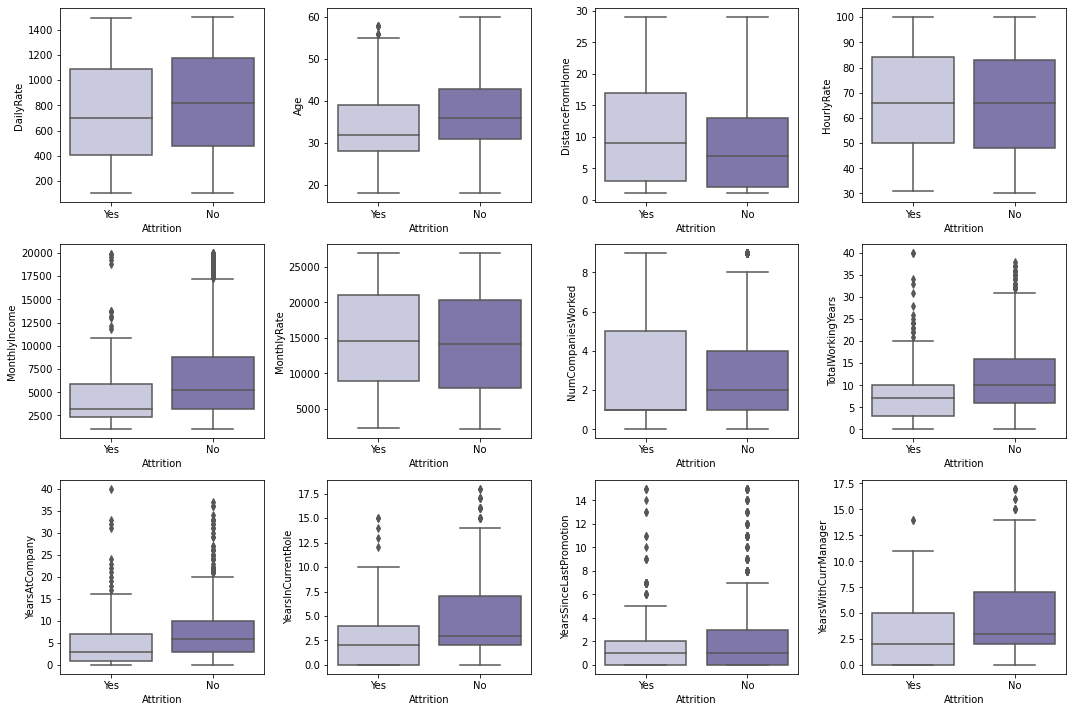

In [100]:
fig, axss = plt.subplots(3,4, figsize=[15,10])
sns.boxplot(x='Attrition', y ='DailyRate', data=data, ax=axss[0][0],palette="Purples")
sns.boxplot(x='Attrition', y ='Age', data=data, ax=axss[0][1],palette="Purples")
sns.boxplot(x='Attrition', y ='DistanceFromHome', data=data, ax=axss[0][2],palette="Purples")
sns.boxplot(x='Attrition', y ='HourlyRate', data=data, ax=axss[0][3],palette="Purples")
sns.boxplot(x='Attrition', y ='MonthlyIncome', data=data, ax=axss[1][0],palette="Purples")
sns.boxplot(x='Attrition', y ='MonthlyRate', data=data, ax=axss[1][1],palette="Purples")
sns.boxplot(x='Attrition', y ='NumCompaniesWorked', data=data, ax=axss[1][2],palette="Purples")
sns.boxplot(x='Attrition', y ='TotalWorkingYears', data=data, ax=axss[1][3],palette="Purples")
sns.boxplot(x='Attrition', y ='YearsAtCompany', data=data, ax=axss[2][0],palette="Purples")
sns.boxplot(x='Attrition', y ='YearsInCurrentRole', data=data, ax=axss[2][1],palette="Purples")
sns.boxplot(x='Attrition', y ='YearsSinceLastPromotion', data=data, ax=axss[2][2],palette="Purples")
sns.boxplot(x='Attrition', y ='YearsWithCurrManager', data=data, ax=axss[2][3],palette="Purples")
plt.tight_layout()

Now we will visualize the non-numerical features.

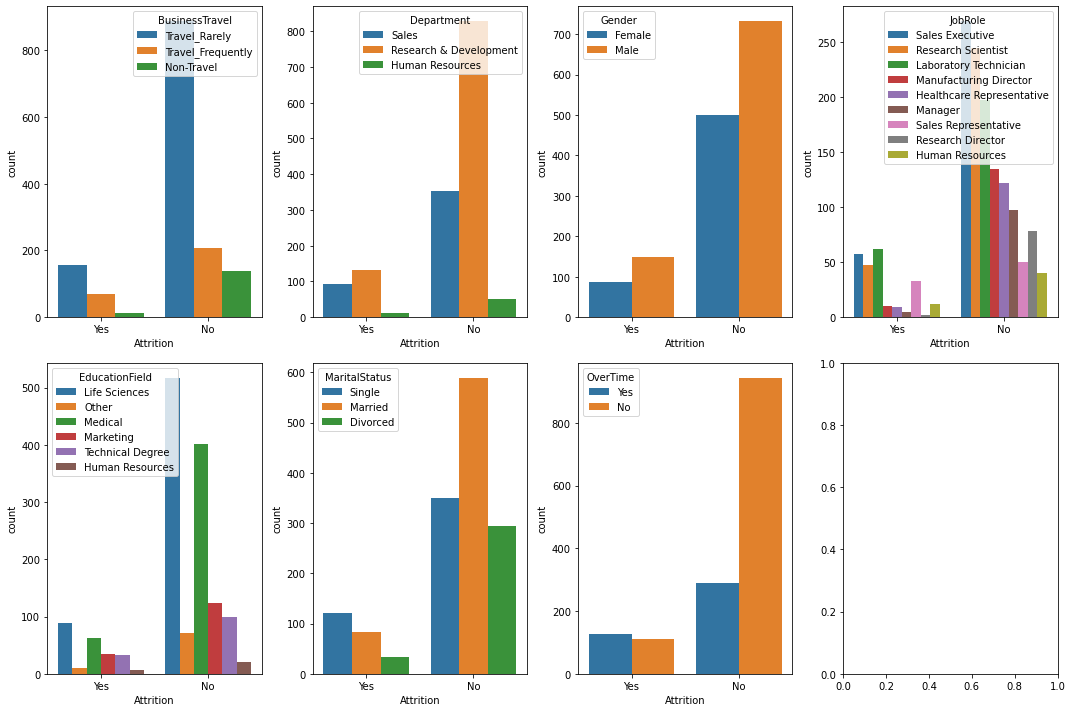

In [101]:
fig,axss = plt.subplots(2,4, figsize=[15,10])
sns.countplot(x='Attrition', hue='BusinessTravel', data=data, ax=axss[0][0])
sns.countplot(x='Attrition', hue='Department', data=data, ax=axss[0][1])
sns.countplot(x='Attrition', hue='Gender', data=data, ax=axss[0][2])
sns.countplot(x='Attrition', hue='JobRole', data=data, ax=axss[0][3])
sns.countplot(x='Attrition', hue='EducationField', data=data, ax=axss[1][0])
sns.countplot(x='Attrition', hue='MaritalStatus', data=data, ax=axss[1][1])
sns.countplot(x='Attrition', hue='OverTime', data=data, ax=axss[1][2])
plt.tight_layout()

For feature engineering, we will check correlations between each features and tranform non-numerical feature into numerical by different ways such as encoding.

Now we will transform the binary into 0 and 1.

In [102]:
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
data['OverTime'] = data['OverTime'].map({'Yes': 1, 'No': 0})

Now we will check the correlation between numerical features and target variables.

In [103]:
corr_score = data[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
                   'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 
                   'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',  'RelationshipSatisfaction', 
                   'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
                   'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
                  'YearsWithCurrManager', 'Attrition']].corr()
corr_score

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


Now we will find the correlation using heatmap.

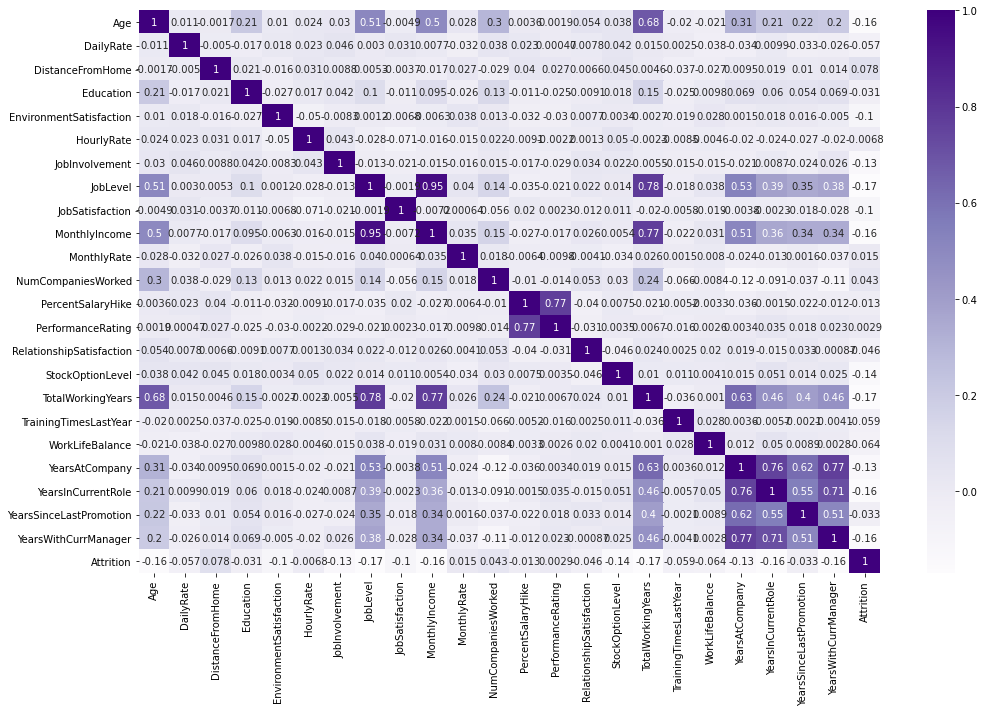

In [104]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_score,cmap="Purples",annot = True)
plt.tight_layout()

We will drop target column and get a new dataframe.

In [105]:
y = data["Attrition"]
newdata = data.drop(columns = ["Attrition"])

Now we will apply encoding to the non numerical features.

In [106]:
newdata = pd.get_dummies(newdata,columns = ['BusinessTravel', 'Gender', 'MaritalStatus'], drop_first = True)
newdata = pd.get_dummies(newdata)
newdata.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,0,0,0,1,0
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,0,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,0,0,0,1,0,0,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,0,0,0,1,0,0
4,27,591,2,1,1,40,3,1,2,3468,...,0,0,0,1,0,0,0,0,0,0


In [107]:
print(list(newdata.columns))

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Department_Human Resources', 'Department_Research & Development', 'Department_Sales', 'EducationField_Human Resources', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'JobRole_Healthcare Representative', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Directo

In [108]:
print('Now there are', newdata.shape[0], 'rows and',newdata.shape[1],'columns in this dataset')

Now there are 1470 rows and 47 columns in this dataset


Now we will filter out those columns that requires to be standarized.

In [109]:
col_standard = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction',
               'HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','NumCompaniesWorked',
               'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
               'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
               'YearsWithCurrManager']

We will standarizing the numerical features so that all the numerical features are normally distributed for better prediction.

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in col_standard:
    newdata[col] = newdata[col].astype(float)
    newdata[[col]] = sc.fit_transform(newdata[[col]])
newdata.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative
0,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,...,0,0,0,0,0,0,0,0,1,0
1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,...,0,0,0,0,0,0,0,1,0,0
2,0.008343,1.414363,-0.887515,-0.891688,1.169781,1.284725,-1.026167,-0.961486,0.246200,-0.937654,...,0,0,0,1,0,0,0,0,0,0
3,-0.429664,1.461466,-0.764121,1.061787,1.169781,-0.486709,0.379672,-0.961486,0.246200,-0.763634,...,0,0,0,0,0,0,0,1,0,0
4,-1.086676,-0.524295,-0.887515,-1.868426,-1.575686,-1.274014,0.379672,-0.961486,-0.660853,-0.644858,...,0,0,0,1,0,0,0,0,0,0


As we have a new and cleaned dataset with all features now we will start the model training and find the best fit model.

In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(newdata,y,test_size = 0.25)

print('Training data has '+str(x_train.shape[0])+' observation with '+str(x_train.shape[1]) + ' features')
print('Test data has '+str(x_test.shape[0])+' observation with '+str(x_test.shape[1]) + ' features')

Training data has 1102 observation with 47 features
Test data has 368 observation with 47 features


Now we will find the best fit model.

In [193]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

In [194]:
lr = LogisticRegression(random_state = 6)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 6)
dt = DecisionTreeClassifier(random_state = 6)

In [195]:
model = [lr,knn,rf,dt]
score_res = []
for i in model:
    bestmodel = cross_val_score(i,x_train,y_train, cv = 5)
    score_res.append(bestmodel)
    
model_names = ["LogisticRegression","KNN","Random Forest","Decision Tree"]
index = ["cv_1","cv_2","cv_3","cv_4","cv_5"]
accuracy = pd.DataFrame(np.array(score_res).T, columns = model_names, index = index).round(decimals=3)
print("="*60)
print("The Score is listed below \n\n",accuracy)
print("="*60)

The Score is listed below 

       LogisticRegression    KNN  Random Forest  Decision Tree
cv_1               0.878  0.796          0.846          0.769
cv_2               0.887  0.819          0.846          0.783
cv_3               0.841  0.814          0.814          0.768
cv_4               0.873  0.827          0.859          0.795
cv_5               0.868  0.809          0.855          0.782


From above it is seen that the Decision Tree has less accuracy score as compare to the other models and now we will use hypertuning to find the best params 

In [196]:
best_models = []
def get_grid_res(gs):
    print("Best Score:", "{:.3f}".format(gs.best_score_))
    print("Best Parameters:")
    best_params = gs.best_params_
    for k, v in best_params.items():
        print(k, ":", v)

Here we have created the class get_grid_res through which we will find the best parameters of best model.

In [197]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,random_state=6)

In [198]:
#hyperparameter tuning for logistics regression
lr_params = {'penalty':('l1','l2'),
            'C' : (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10)}

In [199]:
from sklearn.model_selection import GridSearchCV
grid_lr = GridSearchCV(lr,lr_params,cv=kfold)
grid_lr.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=False),
             estimator=LogisticRegression(random_state=6),
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10),
                         'penalty': ('l1', 'l2')})

In [200]:
get_grid_res(grid_lr)

Best Score: 0.861
Best Parameters:
C : 1
penalty : l2


In [201]:
best_lr_model = grid_lr.best_estimator_
print(best_lr_model)
best_models.append(('Logistic Regression',best_lr_model))

LogisticRegression(C=1, random_state=6)


In [202]:
#hyperparameter tuning on KN neighbors
knn_params = {
    'n_neighbors':(3,5,7,9,11,13,15,17,21,31,59,61,63) 
}

In [203]:
grid_knn = GridSearchCV(knn, knn_params, cv= kfold)
grid_knn.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (3, 5, 7, 9, 11, 13, 15, 17, 21, 31, 59,
                                         61, 63)})

In [204]:
knn_res = grid_knn.cv_results_

In [205]:
get_grid_res(grid_knn)

Best Score: 0.840
Best Parameters:
n_neighbors : 9


In [206]:
best_knn_model = grid_knn.best_estimator_
print(best_knn_model)
best_models.append(('KN Neighbors',best_knn_model))

KNeighborsClassifier(n_neighbors=9)


In [207]:
#hyperparameter tuning for random forest
rf_params = {'criterion' : ['gini' , 'entropy'],
            'n_estimators' : [20,40,60,80],
             'min_samples_split' : [4,6,8],
            'max_depth' : [1,5,10,15],
            'max_features' : ["sqrt","auto","log2"]
            }

grid_rf = GridSearchCV(rf,rf_params,cv=kfold)
grid_rf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=False),
             estimator=RandomForestClassifier(random_state=6),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 5, 10, 15],
                         'max_features': ['sqrt', 'auto', 'log2'],
                         'min_samples_split': [4, 6, 8],
                         'n_estimators': [20, 40, 60, 80]})

In [208]:
get_grid_res(grid_rf)

Best Score: 0.858
Best Parameters:
criterion : gini
max_depth : 15
max_features : log2
min_samples_split : 8
n_estimators : 20


In [209]:
rf_res = grid_rf.cv_results_

In [210]:
best_rf_model = grid_rf.best_estimator_
print(best_rf_model)
best_models.append(('Random Forest',best_rf_model))

RandomForestClassifier(max_depth=15, max_features='log2', min_samples_split=8,
                       n_estimators=20, random_state=6)


In [211]:
#hyperparameter tuning for decision tree
dt_params = {'max_depth':[1,5,10,15],
            'min_samples_split':[2,4,6,8,10]}

grid_dt = GridSearchCV(dt,dt_params, cv = kfold)
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=6, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=6),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [212]:
get_grid_res(grid_dt)

Best Score: 0.831
Best Parameters:
max_depth : 1
min_samples_split : 2


In [213]:
best_dt_model = grid_dt.best_estimator_
print(best_dt_model)
best_models.append(('Decision Tree',best_dt_model))

DecisionTreeClassifier(max_depth=1, random_state=6)


Now we will print the confusion matrix, precision-recall and f1 score.

In [216]:
from sklearn.metrics import plot_confusion_matrix
for name,model in best_models:
    print(name)
    
def plot_cm(models):
    sns.set_style('white')
    class_names= ['No','Yes']
    for model_name, model in models:
        cm = confusion_matrix(y_test,model.predict(x_test))
        tn = cm[0][0]
        fp = cm[0][1]
        fn = cm[1][0]
        tp = cm[1][1]
        accuracy = (tp + tn) / (tp + fp + fn +tn + 0.0)
        precision = tp / (tp + fp + 0.0)
        recall = tp / (tp + fn + 0.0)
        f1 = 2 / ((1 / precision) + (1 / recall))
        plot_confusion_matrix(model, x_test, y_test,
                             display_labels = class_names,
                             cmap = "Purples")
        plt.title(model_name, fontsize = 15)
        plt.ylabel('Actual',fontsize = 15)
        plt.xlabel('Predicted\nAccuracy = {}\nPrecision = {}\nRecall = {}\nF1 = {}'
                   .format((round(accuracy, 3)),round(precision, 3),round(recall, 3),round(f1, 3)),fontsize = 15)

Logistic Regression
KN Neighbors
Random Forest
Decision Tree


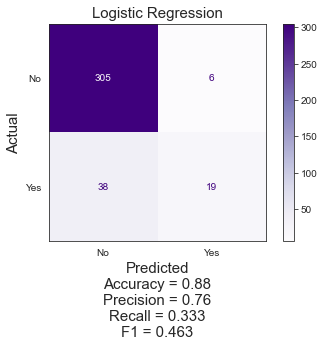

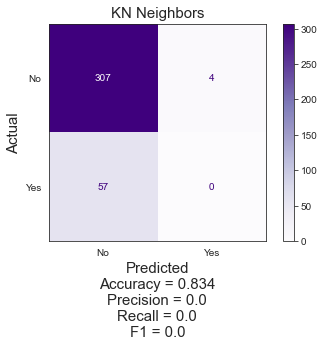

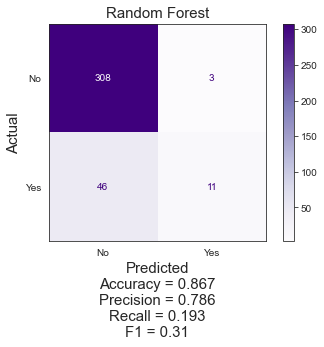

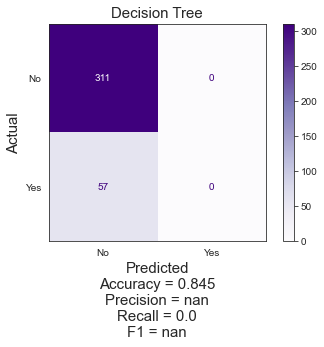

In [217]:
plot_cm(best_models)

From above it is seen that the best prediction model is Logistic Regression as the accuracy score is highest among all the models.
Now we will plot the roc auc curve.

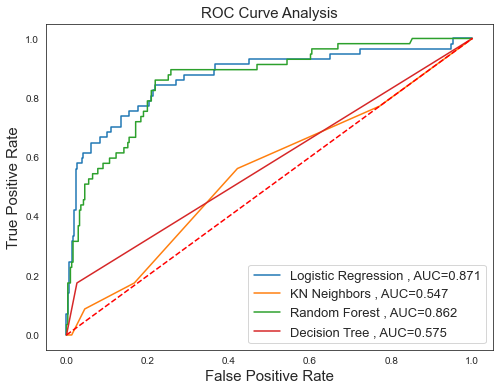

In [221]:
result_table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])
for model_name,model in best_models:
    yproba = model.predict_proba(x_test) [::,1]
    
    fpr,tpr, _ = roc_curve(y_test , yproba)
    auc = roc_auc_score(y_test, yproba)
    result_table = result_table.append({'classifiers': model_name,
                                       'fpr' : fpr,
                                       'tpr' : tpr,
                                       'auc' : auc}, ignore_index = True)
    
result_table.set_index('classifiers' ,inplace = True)

plt.figure(figsize = (8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
            result_table.loc[i]['tpr'],
            label="{} , AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
    
plt.plot([0,1], [0,1] , color = 'red' , linestyle='--')
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
plt.title('ROC Curve Analysis', fontsize = 15)
plt.legend(prop={'size':13}, loc = 'lower right')

As from above plot we can clearly see that the auc for logistic regression is highest and random forest is the second highest so we will find the features using random forest.

In [227]:
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance', ascending = False)\
    .reset_index(drop = True)
    return df

def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'purple')
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel(imp_df.columns[1], fontsize = 20)
    plt.ylabel(imp_df.columns[0], fontsize = 20)
    plt.tight_layout()

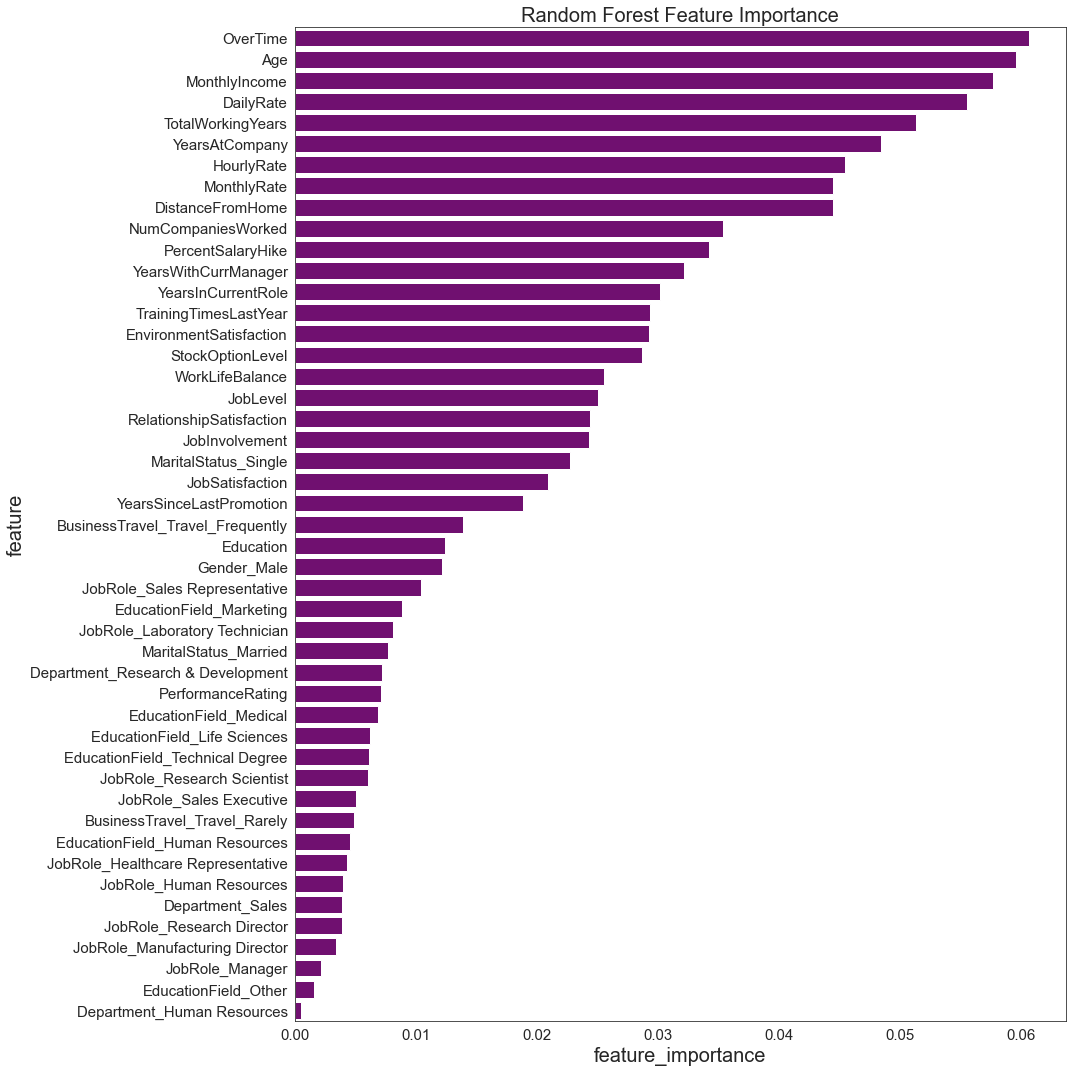

In [234]:
base_imp = imp_df(x_train.columns, best_rf_model.feature_importances_)
plt.figure(figsize=(15, 15))
var_imp_plot(base_imp, 'Random Forest Feature Importance')

As we see from the plot we find the features that are important for HR attrition and that which we dont requires already drops.
Now we will save the best model amongst both.

In [237]:
import joblib
joblib.dump(best_lr_model,"HR Attrition")

['HR Attrition']